# Document categorization; Supervised learning on text data

---  

# Objective of this notebook
Classify the word documents to one of the following categories:

1. Confidential
2. Non-Confidential
3. Restricted
4. Secret
5. Unclassified
 


<h4>Read all the word documents and create a json file containing summary and other properties</h4>

In [1]:
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Conv2D, Flatten, Dense

%run main.py  \DataWord Output\scanWord.json

Using TensorFlow backend.


Have you been to https://www.cloudmersive.com/nlp-api to create your API key? yes/no answers onlyn
If you want to use T5 you need to get an API key, visit https://www.cloudmersive.com/nlp-api to createone, it's free! Using Spacy models and graph approach instead.
module 'tensorflow.python.framework.ops' has no attribute '_TensorLike'
You need to download a model for object detection such as TinyYOLOV3
D:\Classification\StructureMe\StructureMe-master\DataWord
#####################
SCAN STARTED
['D:\\Classification\\StructureMe\\StructureMe-master\\DataWord\\legislation.nt.gov.au.doc']
Got file locations
-----------------------
Fetching :  D:\Classification\StructureMe\StructureMe-master\DataWord\legislation.nt.gov.au.doc
ERROR:: The command `antiword D:\Classification\StructureMe\StructureMe-master\DataWord\legislation.nt.gov.au.doc` failed with exit code 127
------------- stdout -------------
------------- stderr -------------
 : legislation.nt.gov.au.doc
SCAN FINISHED
################

<h4>Read and preprocess the metadata of the documents</h4>

In [2]:
import pandas as pd 
import json
from Preprocessing_Functions import read_metadata, preprocess
import string
import re
import spacy
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer

In [3]:


def lemmatization(texts, allowed_postags=['NOUN', 'ADJ', 'VERB', 'ADV']):
    """https://spacy.io/api/annotation"""
    texts_out = []
    for sent in texts:
        doc = nlp(" ".join(sent)) 
        texts_out.append([token.lemma_ for token in doc if token.pos_ in allowed_postags])
    return texts_out

texts= read_metadata()

lst = []
for w in texts:
    title = w[0]
    title = title.replace('www.','')
    title = title.replace('au','')
    title = title.replace('com','')
    title = title.replace('gov','')
    title = title[0:25]
    title = ' '.join(title.split('.')) 
    lst.append(title + ' ' + w[1])
    
#textlist = [w for w in lst] 
textlist = [w[1] for w in texts]
#Since we are using all the content of the file for this classficication, we need to pre-process it.
#doc_text  = [preprocess(d) for d in textlist]
docwordlist =[]
for text in textlist:
    lst =[]
    translator = str.maketrans('', '', string.punctuation)
    text = text.translate(translator)
    
    #remove numbers
    text = re.sub(r'\d+', '', text)
    
    
    lst.append(text)
    nlp = spacy.load('en_core_web_sm', disable=['parser', 'ner'])
    text = lemmatization(lst)
    stop_words = stopwords.words('english')
    stop_words.extend(['tags','text','text_contents','contents','textcontents']) 
    vec = CountVectorizer(ngram_range=(1, 2), stop_words=stop_words).fit(lst)
    bag_of_words = vec.transform(lst)

    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vec.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    #print(bigram_mod[doc_text[2]])

    wordlist = []
    for word, freq in words_freq: 
        wordlist.append(word)

    docwordlist.append(wordlist) 

print('PRE-PROCESSED(TOKENIZED) DATA')



PRE-PROCESSED(TOKENIZED) DATA


<h4>Create a dataframe and update it with cleaned and pre-processed tokens</h4>

In [10]:
df = pd.read_json('./Output/scan.json',orient='index')
#df = df.applymap(str)
#print(len(doc_text))
print(df.shape)


for i, row in df.iterrows():   
    df.at[i,'content'] = ','.join(docwordlist[i-1])
    

(236, 9)


In [11]:
print(docwordlist[0])
df.head()

['stand', 'support', 'government', 'hours', 'roles', 'wage', 'times', 'steps', 'namepartial', 'many', 'businesses', 'unpaid', 'business', 'previous', 'workinsert', 'social', 'distancing', 'requirements', 'useful', 'unforeseen', 'challenges', 'home', 'agreement', 'work', 'phone', 'details', 'functions', 'jobkeeper', 'working', 'wage support', 'support times', 'times steps', 'steps namepartial', 'namepartial stand', 'stand stand', 'stand many', 'many businesses', 'businesses unpaid', 'unpaid stand', 'stand business', 'business government', 'government support', 'support previous', 'previous hours', 'hours workinsert', 'workinsert hours', 'hours social', 'social distancing', 'distancing requirements', 'requirements useful', 'useful roles', 'roles unforeseen', 'unforeseen challenges', 'challenges home', 'home agreement', 'agreement roles', 'roles work', 'work phone', 'phone details', 'details functions', 'functions government', 'government jobkeeper', 'jobkeeper working']


content  \
1  stand,support,government,hours,roles,wage,time...   
2  home,company,wfh,office,home office,arrangemen...   
3  documents,employment,employees,support,individ...   
4  support,government,wage,many,businesses,busine...   
5  weeks,redundancy,businesses,service,leave,noti...   

                                               title      authors  \
1  ciavic.com.au_getmedia_0743c48c-dede-4147-9157...   Ian Jordan   
2  ciavic.com.au_getmedia_0fa35ff6-457d-4a91-bedf...         None   
3  ciavic.com.au_getmedia_a0ad087d-48ca-40f9-8717...      CIAUSER   
4  ciavic.com.au_getmedia_a20d2e1a-9c33-41c4-b757...   Ian Jordan   
5  ciavic.com.au_getmedia_a851a766-8227-4464-ab27...  Dan Feldman   

  last_modified_by         created_date        modified_date  \
1      Dan Feldman  2020-03-30 23:52:00  2020-03-30 23:53:00   
2             None  2020-03-29 21:34:00  2020-03-29 22:30:00   
3          CIAUSER  2020-04-06 21:38:00  2020-04-06 23:10:00   
4      Dan Feldman  2020-03-30 23:50:00  2020-03-30 23:51:00   
5      Dan Feldman  2020-03-29 21:21:00  2020-03-29 21:21:00   

                                            location      category  \
1  D:\Classification\StructureMe\StructureMe-mast...  confidential   
2  D:\Classification\StructureMe\StructureMe-mast...  confidential   
3  D:\Classification\StructureMe\StructureMe-mast...  confidential   
4  D:\Classification\StructureMe\StructureMe-mast...  confidential   
5  D:\Classification\StructureMe\StructureMe-mast...  confidential   

                                             summary  
1  {'text_contents': {'tags': ['other wage suppor...  
2  {'text_contents': {'tags': ['wfh arrangementyo...  
3  {'text_contents': {'tags': ['employees', 'affe...  
4  {'text_contents': {'tags': ['other wage suppor...  
5  {'text_contents': {'tags': ['redundancy pay', ...

## Classification 1

<h4>Get documents in each category</h4>

In [13]:
print(df["category"].value_counts())
df_binary1 = df.copy(deep=True)

df_binary1.loc[df_binary1['category'] != 'secret','category'] = 'non-secret'
print(df_binary1["category"].value_counts())
df_binary1.head()

restricted          56
secret              50
confidential        45
non-confidential    43
Unclassified        42
Name: category, dtype: int64
non-secret    186
secret         50
Name: category, dtype: int64


content  \
1  stand,support,government,hours,roles,wage,time...   
2  home,company,wfh,office,home office,arrangemen...   
3  documents,employment,employees,support,individ...   
4  support,government,wage,many,businesses,busine...   
5  weeks,redundancy,businesses,service,leave,noti...   

                                               title      authors  \
1  ciavic.com.au_getmedia_0743c48c-dede-4147-9157...   Ian Jordan   
2  ciavic.com.au_getmedia_0fa35ff6-457d-4a91-bedf...         None   
3  ciavic.com.au_getmedia_a0ad087d-48ca-40f9-8717...      CIAUSER   
4  ciavic.com.au_getmedia_a20d2e1a-9c33-41c4-b757...   Ian Jordan   
5  ciavic.com.au_getmedia_a851a766-8227-4464-ab27...  Dan Feldman   

  last_modified_by         created_date        modified_date  \
1      Dan Feldman  2020-03-30 23:52:00  2020-03-30 23:53:00   
2             None  2020-03-29 21:34:00  2020-03-29 22:30:00   
3          CIAUSER  2020-04-06 21:38:00  2020-04-06 23:10:00   
4      Dan Feldman  2020-03-30 23:50:00  2020-03-30 23:51:00   
5      Dan Feldman  2020-03-29 21:21:00  2020-03-29 21:21:00   

                                            location    category  \
1  D:\Classification\StructureMe\StructureMe-mast...  non-secret   
2  D:\Classification\StructureMe\StructureMe-mast...  non-secret   
3  D:\Classification\StructureMe\StructureMe-mast...  non-secret   
4  D:\Classification\StructureMe\StructureMe-mast...  non-secret   
5  D:\Classification\StructureMe\StructureMe-mast...  non-secret   

                                             summary  
1  {'text_contents': {'tags': ['other wage suppor...  
2  {'text_contents': {'tags': ['wfh arrangementyo...  
3  {'text_contents': {'tags': ['employees', 'affe...  
4  {'text_contents': {'tags': ['other wage suppor...  
5  {'text_contents': {'tags': ['redundancy pay', ...

<h4>Document Category distribution </h4>

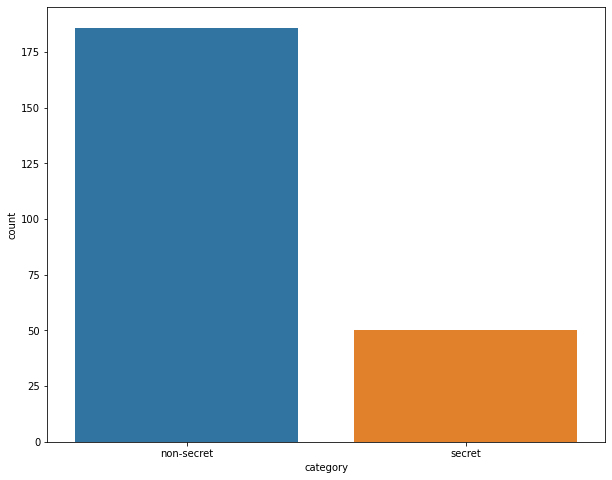

In [14]:
from matplotlib import rcParams
import seaborn as sns

rcParams["figure.figsize"] = 10,8
a=sns.countplot(x = df_binary1["category"])

<h4>Add a new column to show length of each document</h4>

In [73]:
df_binary1['document_len'] = df_binary1['content'].astype(str).apply(len)
df_binary1['category_id'] = df_binary1['category'].factorize()[0]
df_binary1.tail()

content  \
232  research,examiners,graduate,graduate research,...   
233  research,faculty,staff,register,student,superv...   
234  research,supervision,supervisor,register,princ...   
235  examination,thesis,thesis examination,research...   
236  recommendation,examiner,revised,thesis,respons...   

                                                 title             authors  \
232  www.uts.edu.au_sites_default_files_2020-07_grs...              104396   
233  www.uts.edu.au_sites_default_files_2020-09_grs...  Lesley Dangerfield   
234  www.uts.edu.au_sites_default_files_2020-09_grs...  Lesley Dangerfield   
235  www.uts.edu.au_sites_default_files_2020-09_grs...       Valeria Passo   
236  www.uts.edu.au_sites_default_files_2020-09_grs...       Valeria Passo   

       last_modified_by         created_date        modified_date  \
232  Micaela Paddon-Row  2020-07-10 04:13:00  2020-07-13 06:15:00   
233  Micaela Paddon-Row  2019-09-16 00:28:00  2020-09-17 02:50:00   
234  Micaela Paddon-Row  2020-09-15 06:33:00  2020-09-17 02:52:00   
235       Valeria Passo  2020-09-10 08:35:00  2020-09-10 08:38:00   
236       Valeria Passo  2020-09-16 00:43:00  2020-09-16 00:44:00   

                                              location    category  \
232  D:\Classification\StructureMe\StructureMe-mast...  non-secret   
233  D:\Classification\StructureMe\StructureMe-mast...  non-secret   
234  D:\Classification\StructureMe\StructureMe-mast...  non-secret   
235  D:\Classification\StructureMe\StructureMe-mast...  non-secret   
236  D:\Classification\StructureMe\StructureMe-mast...  non-secret   

                                               summary  document_len  \
232  {'text_contents': {'tags': ['potential examine...          1121   
233  {'text_contents': {'tags': ['research student ...          1155   
234  {'text_contents': {'tags': ['research student ...          1172   
235  {'text_contents': {'tags': ['examiner recommen...          1405   
236  {'text_contents': {'tags': ['examiner recommen...           699   

     category_id  
232            0  
233            0  
234            0  
235            0  
236            0

In [16]:
import matplotlib.pyplot as plt
    
def tags_freq(tags, top=30, figsize=(10,5)):  
    
    my_list =  [item.split(",") for item in tags]  
    
    tags_list = tags.sum()
    map_lst= [item for sublist in my_list for item in sublist]
    dtf_tags = pd.DataFrame(map_lst,columns=['tag'])
    
    dtf_tags["count"] = 1
    dtf_tags = dtf_tags.groupby(['tag']).count().reset_index().sort_values("count", ascending=False)
    fig, ax = plt.subplots(figsize=figsize)
    fig.suptitle("Top frequent words", fontsize=12)
    sns.barplot(x="count", y="tag", data=dtf_tags.iloc[:top,:], dodge=False, ax=ax)
    ax.set(ylabel=None)
    ax.grid(axis="x")
    plt.show()
    return dtf_tags

# non-secret:


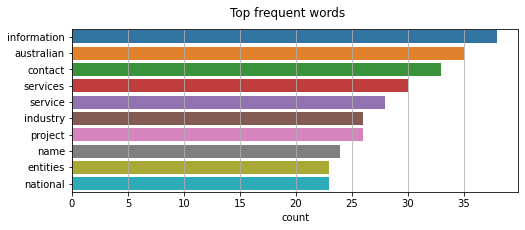

# secret:


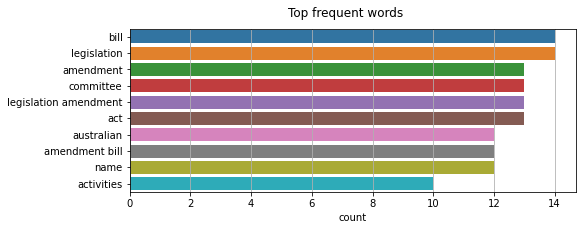

In [17]:
for y in df_binary1["category"].unique():
    print("# {}:".format(y))
    common_tags = tags_freq(tags=df_binary1[df_binary1["category"]==y]["content"], top=10, figsize=(8,3))

### Let us split the dataframe to test and train

In [171]:
from sklearn.model_selection import train_test_split
df_binary1 = df.copy(deep=True)
df_train, df_test = train_test_split(df_binary1, test_size=0.2,shuffle=True ,random_state=42)
df_train, df_test = train_test_split(df_binary1, test_size=0.2,shuffle=True, random_state=20)
## get target
y_train = df_train["category"].values
y_test = df_test["category"].values


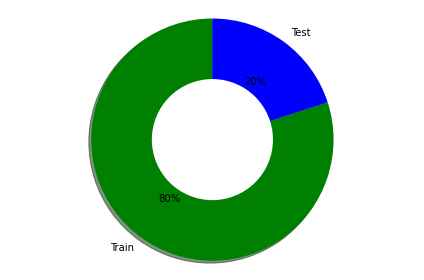

In [83]:
import matplotlib.pyplot as plt
name = ['Train', 'Test']
people = [80, 20]
plt.pie(people, labels=name, autopct='%0.f%%', colors=['green','blue'] , shadow=True, startangle=90)

circle = plt.Circle((0,0),0.50,fc='white') 
donut = plt.gcf()
donut.gca().add_artist(circle)
plt.axis('equal')
plt.tight_layout()


<h4>Dehine TFIDF Vectorizer</h4>

In [172]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import TfidfTransformer
from sklearn.ensemble import RandomForestClassifier, ExtraTreesClassifier,AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

#transformer = TfidfTransformer(smooth_idf=False)
#count_vectorizer = CountVectorizer(ngram_range=(1, 2))
vectorizer = TfidfVectorizer(max_features=None, ngram_range=(1,2)) 
    


### Check how well the features are distributed and if our matrix is sparse


In [173]:
# This is the corpus , features used by model
corpus= df_train["content"]

# fit train data to the count vectorizer
vectorizer = vectorizer.fit(corpus)#.toarray()

#fit the ngrams count to the tfidf transformers
X_train = vectorizer.transform(corpus)
X_test = df_test["content"].values

print('Number of Documents to train : ' + str(len(corpus)))
print('Shape of feature matrix: ' + str(X_train.shape))

#print(count_vectorizer.get_feature_names())
dic_vocabulary = vectorizer.vocabulary_
print(len(dic_vocabulary), "words in dictionary vocabulary")


print('Number of Documents in Test: ' + str(len(X_test)))

Number of Documents to train : 188
Shape of feature matrix: (188, 14821)
14821 words in dictionary vocabulary
Number of Documents in Test: 48


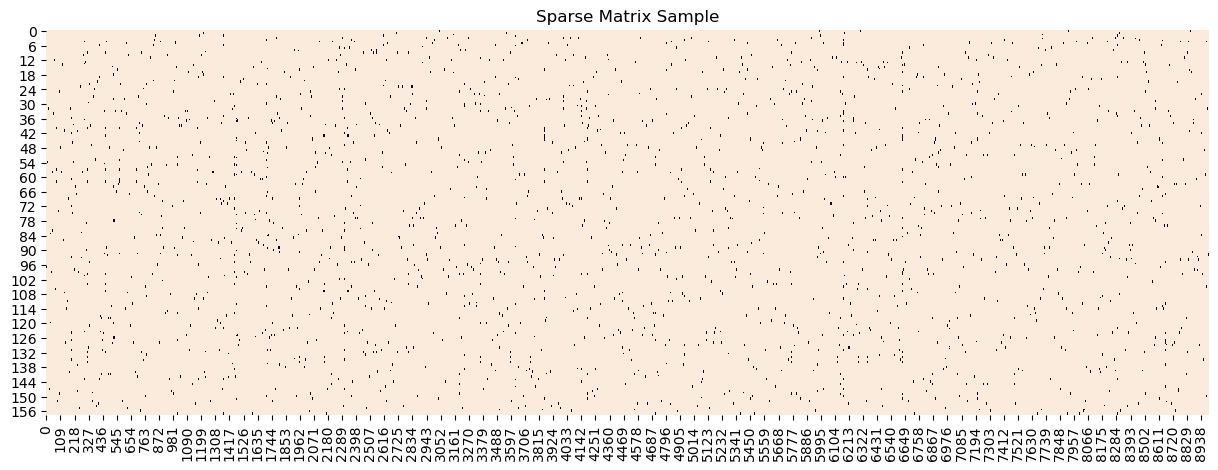

In [203]:
import numpy as np

## plot heatmap
fig, ax = plt.subplots(figsize=(15,5))
sns.heatmap(X_train.todense()[:,np.random.randint(0,X_train.shape[1],9000)]==0, vmin=0, vmax=1, cbar=False, ax=ax).set_title('Sparse Matrix Sample')
plt.show()

## Train the models

In [174]:
from sklearn import pipeline

def fit_ml_classif(X_train, y_train, X_test, vectorizer=None, classifier=None): 
    ## model pipeline
    vectorizer = TfidfVectorizer() if vectorizer is None else vectorizer
    classifier = naive_bayes.MultinomialNB() if classifier is None else classifier
    model = pipeline.Pipeline([("vectorizer",vectorizer), ("classifier",classifier)])
    
    ## train
    if vectorizer is None:
        model.fit(X_train, y_train)
    else:
        model["classifier"].fit(X_train, y_train)
    
    ## test
    predicted = model.predict(X_test)
    predicted_prob = model.predict_proba(X_test)
    return model, predicted_prob, predicted

### Call Naive Bayes model

In [176]:
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
# Predict and calculate accuracy
from sklearn.metrics import accuracy_score

classifier = MultinomialNB()

model, predicted_prob, predicted = fit_ml_classif(X_train,y_train,X_test, vectorizer, classifier)


print('Accuracy of Naive Bayes classifier on training set: {:.2f}'.format(classifier.score(X_train, y_train)))
accuracy = metrics.accuracy_score(y_test, predicted)
print("Accuracy of Naive Bayes classifier on test set: {:.2f}".format(round(accuracy,2)))
#print("Detail:")
#print(metrics.classification_report(y_test, predicted))

Accuracy of Naive Bayes classifier on training set: 0.99
Accuracy of Naive Bayes classifier on test set: 0.85


### Call Logistic Regression

In [175]:
from sklearn.linear_model import LogisticRegression
#logreg_classifier = LogisticRegression()#(C=1e5,max_iter=3000)
logreg_classifier = LogisticRegression(multi_class='ovr')#penalty='l2', C=10 , solver='liblinear')


logreg_model, logreg_predicted_prob, logreg_predicted = fit_ml_classif(X_train,y_train,X_test, vectorizer, logreg_classifier)

print('Accuracy of Logreg classifier on training set: {:.2f}'.format(logreg_classifier.score(X_train, y_train)))
accuracy = metrics.accuracy_score(y_test, logreg_predicted)
print('Accuracy of Logreg classifier on testing set: {:.2f}'.format(round(accuracy,2)))

Accuracy of Logreg classifier on training set: 0.99
Accuracy of Logreg classifier on testing set: 0.92


### Call XGBoost 

In [177]:
from xgboost import XGBClassifier

# fit model no training data
XG = XGBClassifier( use_label_encoder=False, objective='binary:logistic')
y_train_xg = df_train["category_id"].values
y_test_xg = df_test['category_id'].values
xg_model, xg_predicted_prob, xg_predicted = fit_ml_classif(X_train,y_train_xg, X_test, vectorizer, XG)
#XG.fit(X_train, y_train_xg)

print('Accuracy of xgboost classifier on training set: {:.2f}'.format(XG.score(X_train, y_train_xg)))
X_test_x= vectorizer.transform(X_test)
print('Accuracy of xgboost classifier on test set: {:.2f}'.format(XG.score(X_test_x, y_test_xg)))



KeyError: 'category_id'

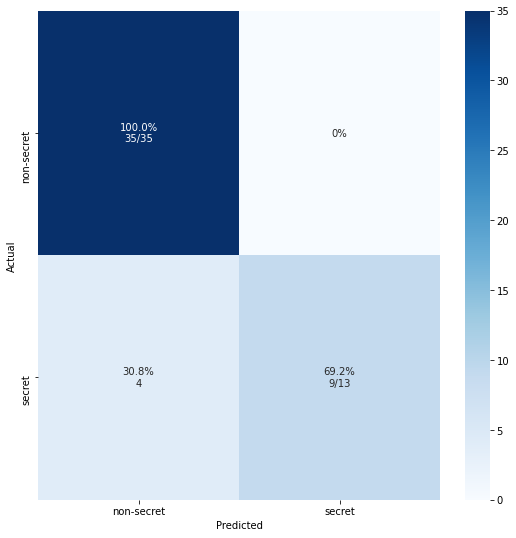

In [178]:
from sklearn import metrics
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np

labels=["non-secret","secret"]
CM = metrics.confusion_matrix(y_test_xg, xg_predicted)#,labels=["non-secret","secret" ])

cm_sum = np.sum(CM, axis=1, keepdims=True)
cm_perc = CM / cm_sum.astype(float) * 100
annot = np.empty_like(CM).astype(str)
nrows, ncols = CM.shape
for i in range(nrows):
    for j in range(ncols):
        c = CM[i, j]
        p = cm_perc[i, j]
        if i == j:
            s = cm_sum[i]
            annot[i, j] = '%.1f%%\n%d/%d' % (p, c, s)
        elif c == 0:
            annot[i, j] = '0%'
        else:
            annot[i, j] = '%.1f%%\n%d' % (p, c)
cm = pd.DataFrame(CM, index=labels, columns=labels)
cm.index.name = 'Actual'
cm.columns.name = 'Predicted'
fig, ax = plt.subplots(figsize=(9,9))
abc=sns.heatmap(cm, annot=annot, fmt='', ax=ax, cmap='Blues')



## Plot the probabilities of prediction from model

In [165]:

df_outProb = pd.DataFrame(xg_predicted_prob,columns= ['non-secret_prob','secret_prob'])
category_id_df = df_binary1[['category', 'category_id']].drop_duplicates()
pred=[]
for i in xg_predicted:  

    pred.append(category_id_df.loc[category_id_df['category_id'] == i].values[0][0])
    
df_outProb['prediction'] = pred
print(category_id_df.head())


       category  category_id
1    non-secret            0
145      secret            1


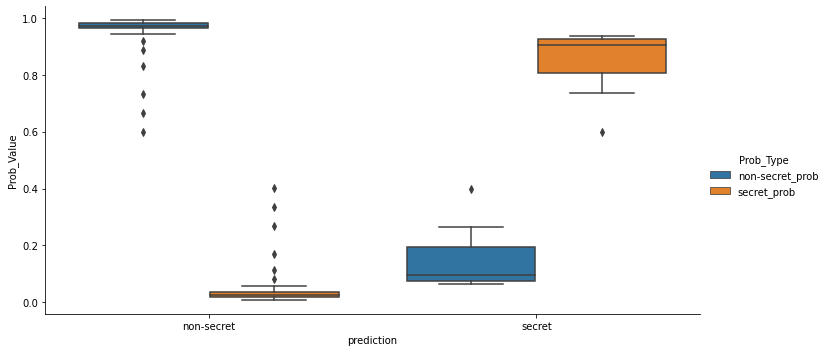

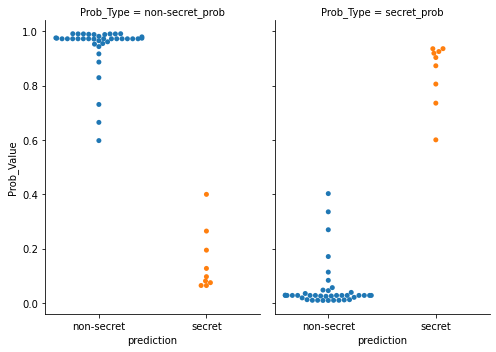

In [162]:
df_strip = pd.melt(df_outProb, id_vars= ['prediction'] , value_vars =['non-secret_prob','secret_prob'] , var_name ='Prob_Type', value_name ='Prob_Value')

a = sns.catplot(y="Prob_Value", x="prediction", hue="Prob_Type", kind="box", data=df_strip, height=5, aspect=2)

b=sns.catplot(x="prediction", y="Prob_Value", col="Prob_Type", aspect=.7, kind="swarm", data=df_strip)

### List the probabilities wheremodel has not predicted correct category

In [163]:
#df_outProb['Max Prob'] = df_outProb[["Unclassified_prob", "confidential_prob" ,'non-confidential_prob','restricted_prob','secret_prob']].max(axis=1)
df_outProb['Actual'] = y_test
df_outProb.head()

#df_lowProb = df_outProb.loc[df_outProb['Max Prob'] < .26]
df_wrong = df_outProb.loc[df_outProb['Actual'] != df_outProb['prediction']]
df_wrong.head()

non-secret_prob  secret_prob  prediction  Actual
4          0.943727     0.056273  non-secret  secret
36         0.829358     0.170643  non-secret  secret
37         0.730698     0.269302  non-secret  secret
47         0.597567     0.402433  non-secret  secret

## Explain the decision of a test

In [164]:
from lime import lime_text
import numpy as np
lstProb = list(df_wrong.index.values)
lstFeatures = []

## select observation
for i in  lstProb: #range(2,3):
    
    txt_instance = X_test[i]
    ## check true value and predicted value
    print("True:", y_test[i], "--> Pred:", logreg_predicted[i])
    ## show explanation

    explainer = lime_text.LimeTextExplainer(class_names = np.unique(y_test))
    explained = explainer.explain_instance(txt_instance, 
                 logreg_model.predict_proba, num_features=5, top_labels=2)
    #print(explained.available_labels())
    explained.show_in_notebook(text=txt_instance, predict_proba=True)
    label = explained.available_labels()[0]
    exp_map = explained.as_list(label=label)
    exp_map.append(logreg_predicted[i])
    print(exp_map)   
    lstFeatures.append(exp_map)
    

#print(logreg_predicted_prob)    

True: secret --> Pred: non-secret


[('activities', -0.020319603793297586), ('funding', -0.017018963857588765), ('centre', 0.013203331718673003), ('participants', -0.009243287433371819), ('key', 0.002973293109512383), 'non-secret']
True: secret --> Pred: non-secret


[('business', -0.17347993338524997), ('plan', -0.01499546100882953), ('planning', 0.007543379796901047), ('service', 0.006978968854680057), ('page', -0.004923598803491459), 'non-secret']
True: secret --> Pred: non-secret


[('business', -0.1716796051567961), ('succession', 0.02653003634877812), ('plan', -0.018278595166485404), ('title', -0.006484317557382632), ('planning', 0.004919296660731334), 'non-secret']
True: secret --> Pred: non-secret


[('rd', -0.06821629003417612), ('activities', -0.046044913741081155), ('eligible', -0.009141415358204072), ('registered', -0.009119040489231456), ('activity', -0.007579855722496794), 'non-secret']


### List the features which led to low probabilities above

In [166]:
print(len(lstFeatures))
df_Features = pd.DataFrame(lstFeatures, columns=['Feature1','Feature2','Feature3','Feature4','Feature5','Prediction'])

#df_Features['Prediction'] = df_lowProb['prediction']
df_Features

4


Feature1                             Feature2  \
0  (activities, -0.020319603793297586)     (funding, -0.017018963857588765)   
1     (business, -0.17347993338524997)         (plan, -0.01499546100882953)   
2      (business, -0.1716796051567961)    (succession, 0.02653003634877812)   
3           (rd, -0.06821629003417612)  (activities, -0.046044913741081155)   

                            Feature3                               Feature4  \
0     (centre, 0.013203331718673003)  (participants, -0.009243287433371819)   
1   (planning, 0.007543379796901047)        (service, 0.006978968854680057)   
2      (plan, -0.018278595166485404)         (title, -0.006484317557382632)   
3  (eligible, -0.009141415358204072)    (registered, -0.009119040489231456)   

                            Feature5  Prediction  
0        (key, 0.002973293109512383)  non-secret  
1      (page, -0.004923598803491459)  non-secret  
2   (planning, 0.004919296660731334)  non-secret  
3  (activity, -0.007579855722496794)  non-secret

<h4>Plot the results of Logistic regression as it has highest accuracy</h4>

## Classification 2

In [167]:
print(df["category"].value_counts())
df_binary2 = df.copy(deep=True)

df_binary2.loc[df_binary2['category'] != 'restricted','category'] = 'non-restricted'
print(df_binary2["category"].value_counts())
df_binary2.head()

restricted          56
secret              50
confidential        45
non-confidential    43
Unclassified        42
Name: category, dtype: int64
non-restricted    180
restricted         56
Name: category, dtype: int64


content  \
1  stand,support,government,hours,roles,wage,time...   
2  home,company,wfh,office,home office,arrangemen...   
3  documents,employment,employees,support,individ...   
4  support,government,wage,many,businesses,busine...   
5  weeks,redundancy,businesses,service,leave,noti...   

                                               title      authors  \
1  ciavic.com.au_getmedia_0743c48c-dede-4147-9157...   Ian Jordan   
2  ciavic.com.au_getmedia_0fa35ff6-457d-4a91-bedf...         None   
3  ciavic.com.au_getmedia_a0ad087d-48ca-40f9-8717...      CIAUSER   
4  ciavic.com.au_getmedia_a20d2e1a-9c33-41c4-b757...   Ian Jordan   
5  ciavic.com.au_getmedia_a851a766-8227-4464-ab27...  Dan Feldman   

  last_modified_by         created_date        modified_date  \
1      Dan Feldman  2020-03-30 23:52:00  2020-03-30 23:53:00   
2             None  2020-03-29 21:34:00  2020-03-29 22:30:00   
3          CIAUSER  2020-04-06 21:38:00  2020-04-06 23:10:00   
4      Dan Feldman  2020-03-30 23:50:00  2020-03-30 23:51:00   
5      Dan Feldman  2020-03-29 21:21:00  2020-03-29 21:21:00   

                                            location        category  \
1  D:\Classification\StructureMe\StructureMe-mast...  non-restricted   
2  D:\Classification\StructureMe\StructureMe-mast...  non-restricted   
3  D:\Classification\StructureMe\StructureMe-mast...  non-restricted   
4  D:\Classification\StructureMe\StructureMe-mast...  non-restricted   
5  D:\Classification\StructureMe\StructureMe-mast...  non-restricted   

                                             summary  
1  {'text_contents': {'tags': ['other wage suppor...  
2  {'text_contents': {'tags': ['wfh arrangementyo...  
3  {'text_contents': {'tags': ['employees', 'affe...  
4  {'text_contents': {'tags': ['other wage suppor...  
5  {'text_contents': {'tags': ['redundancy pay', ...

<h4>Document Category distribution </h4>

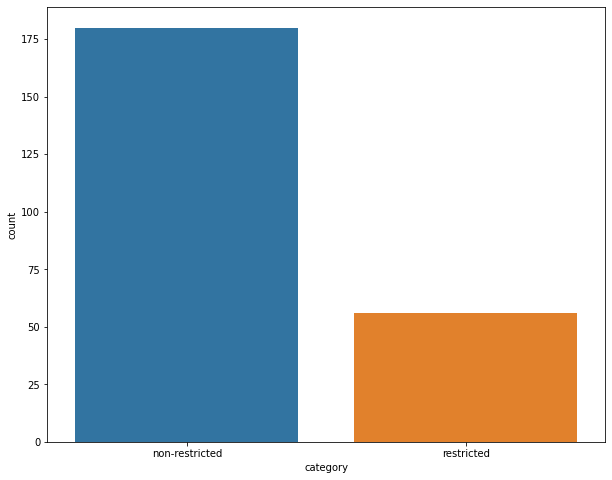

In [168]:
from matplotlib import rcParams
import seaborn as sns

rcParams["figure.figsize"] = 10,8
a=sns.countplot(x = df_binary2["category"])

In [169]:
df_binary1['category_id'] = df_binary1['category'].factorize()[0]
df_binary1.tail()

content  \
232  research,examiners,graduate,graduate research,...   
233  research,faculty,staff,register,student,superv...   
234  research,supervision,supervisor,register,princ...   
235  examination,thesis,thesis examination,research...   
236  recommendation,examiner,revised,thesis,respons...   

                                                 title             authors  \
232  www.uts.edu.au_sites_default_files_2020-07_grs...              104396   
233  www.uts.edu.au_sites_default_files_2020-09_grs...  Lesley Dangerfield   
234  www.uts.edu.au_sites_default_files_2020-09_grs...  Lesley Dangerfield   
235  www.uts.edu.au_sites_default_files_2020-09_grs...       Valeria Passo   
236  www.uts.edu.au_sites_default_files_2020-09_grs...       Valeria Passo   

       last_modified_by         created_date        modified_date  \
232  Micaela Paddon-Row  2020-07-10 04:13:00  2020-07-13 06:15:00   
233  Micaela Paddon-Row  2019-09-16 00:28:00  2020-09-17 02:50:00   
234  Micaela Paddon-Row  2020-09-15 06:33:00  2020-09-17 02:52:00   
235       Valeria Passo  2020-09-10 08:35:00  2020-09-10 08:38:00   
236       Valeria Passo  2020-09-16 00:43:00  2020-09-16 00:44:00   

                                              location    category  \
232  D:\Classification\StructureMe\StructureMe-mast...  non-secret   
233  D:\Classification\StructureMe\StructureMe-mast...  non-secret   
234  D:\Classification\StructureMe\StructureMe-mast...  non-secret   
235  D:\Classification\StructureMe\StructureMe-mast...  non-secret   
236  D:\Classification\StructureMe\StructureMe-mast...  non-secret   

                                               summary  document_len  \
232  {'text_contents': {'tags': ['potential examine...          1121   
233  {'text_contents': {'tags': ['research student ...          1155   
234  {'text_contents': {'tags': ['research student ...          1172   
235  {'text_contents': {'tags': ['examiner recommen...          1405   
236  {'text_contents': {'tags': ['examiner recommen...           699   

     category_id  
232            0  
233            0  
234            0  
235            0  
236            0

# non-restricted:


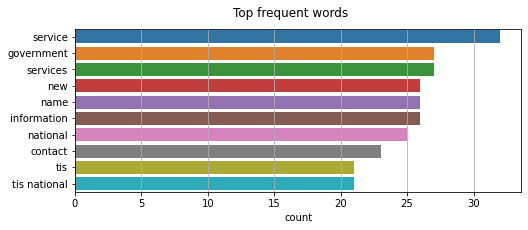

# restricted:


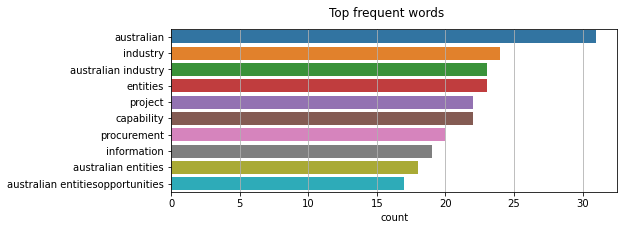

In [170]:
for y in df_binary2["category"].unique():
    print("# {}:".format(y))
    common_tags = tags_freq(tags=df_binary2[df_binary2["category"]==y]["content"], top=10, figsize=(8,3))

### Split the data to test and train

In [ ]:
from sklearn.model_selection import train_test_split

df_train1, df_test1 = train_test_split(df_binary2, test_size=0.2,shuffle=True ,random_state=42)
df_train1, df_test1 = train_test_split(df_binary2, test_size=0.2,shuffle=True, random_state=20)
## get target
y_train1 = df_train1["category"].values
y_test1 = df_test1["category"].values


<h4>Test the model using new test files</h4>

In [368]:
%run main.py \Output\project\test Output\scanTest.json

Have you been to https://www.cloudmersive.com/nlp-api to create your API key? yes/no answers onlyn
If you want to use T5 you need to get an API key, visit https://www.cloudmersive.com/nlp-api to createone, it's free! Using Spacy models and graph approach instead.
module 'tensorflow.python.framework.ops' has no attribute '_TensorLike'
You need to download a model for object detection such as TinyYOLOV3
D:\Classification\StructureMe\StructureMe-master\Output\project\test
#####################
SCAN STARTED
['D:\\Classification\\StructureMe\\StructureMe-master\\Output\\project\\test\\Test1.docx', 'D:\\Classification\\StructureMe\\StructureMe-master\\Output\\project\\test\\Test2.docx']
Got file locations
-----------------------
Fetching :  D:\Classification\StructureMe\StructureMe-master\Output\project\test\Test1.docx
-----------------------
Got content
Edit Time (minutes): 1
Page Count: 1
Word Count: 51
Character Count: 293
Line Count: 2
Paragraph Count: 1
Company: St Michael's Collegiate 

In [369]:
test_texts= read_metadata1('./Output/scanTest.json')

test_textlist = [w[1] for w in test_texts]
test_text  = [preprocess1(d) for d in test_textlist]
print('PRE-PROCESSED(TOKENIZED) DATA')

df_newtest = pd.read_json('./Output/scanTest.json',orient='index')

PRE-PROCESSED(TOKENIZED) DATA


In [373]:

for i, row in df_newtest.iterrows():   
    df_newtest.at[i,'content'] = ' '.join(test_text[i-1])
    
print(df_newtest['location'])

1    D:\Classification\StructureMe\StructureMe-mast...
2    D:\Classification\StructureMe\StructureMe-mast...
Name: location, dtype: object


In [374]:
test_counts = count_vectorizer.transform(df_newtest['content'])
test_tfidf = transformer.transform(test_counts)

predictions_new = logreg.predict(test_tfidf)
print(predictions_new)

['Unclassified' 'restricted']


<h4>Move the files to predicted folders</h4>

In [390]:
import pathlib
from pathlib import Path
import shutil

# Copy files into appropriate topic folders
for cat, filename in zip(predictions_new, df_newtest['location']):    
    src = filename
    p = Path(src)
    parentfolder = p.parents[1]
    file = p.name
    categoryfolder = Path.joinpath(parentfolder, cat)   
    if not os.path.exists(categoryfolder):
        #os.makedirs(categoryfolder)
        Path.mkdir(exist_ok=True)
       
    dest = Path.joinpath(categoryfolder, file)
    print('Moving file to : ' + str(dest))
    copystr = "copy " + src + " " + str(dest)
    shutil.copyfile(src, dest)   

print("Done")

Moving file to : D:\Classification\StructureMe\StructureMe-master\Output\project\Unclassified\Test1.docx
Moving file to : D:\Classification\StructureMe\StructureMe-master\Output\project\restricted\Test2.docx
Done
